<center><h3> Preliminary Data Exploration </h3>
<h4> "What does the data look like?" </h4></center>

<h4> Features </h4>
Table 1: Feature Dictionary

| Feature | Description |
| --- | --- |
| Elevation | Vertical elevation from sea level (meters) |
| Aspect | The direction that the plot of land is facing (degees azimuth)|
| Slope | The average slope of the plot of land (degrees) |
| HdistWater | Horizontal distance to nearest surface water (meters) |
| VdistWater | Vertical distance to nearest surface water (meters) |
| HdistRoad | Horizontal distance to nearest road (meters) |
| Shade9 | Hill-shade index at 9am during summer solstics (0-255) |
| Shade12 | Hill-shade index at 12pm during summer solstics (0-255) |
| Shade3 | Hill-shade index at 3pm during summer solstics (0-255) |
| HdistFire | Horizontal distance to nearest wildfire ignition point (meters) |
| WA* | 4 binary columns represent the wilderness area designation |
| Soil* | 40 binary columns represent the soil type (1-40) |

<h4> Importing Packages </h4>

In [3]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import math
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

<h4> Loading the Data </h4>

In [4]:
tree_species_data = pd.read_csv('Train.csv')
# Peek at the first 5 rows of the data frame
tree_species_data.describe()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil32,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target
count,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,...,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000,418755.000000
mean,2958.652931,155.627665,14.104725,269.375518,46.437189,2350.882487,212.140493,223.311488,142.521852,1982.101396,...,0.089933,0.077398,0.002763,0.003281,0.000193,0.000518,0.026679,0.023751,0.015035,0.364003
std,280.417530,111.845819,7.500245,212.619856,58.291467,1559.971710,26.809926,19.785907,38.309003,1326.750810,...,0.286086,0.267223,0.052491,0.057187,0.013907,0.022758,0.161144,0.152274,0.121692,0.481150
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1104.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2552.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,599.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4> Exploring the Data </h4>

In [5]:
# check that data types are all int or float
print('Feature    |   Data Type')
print ('________________________')
print(tree_species_data.dtypes)

print('\n-------------------------\n')

# check whether null values exist
print("Null values exist (T/F):", tree_species_data.isnull().values.any())

print('\n-------------------------\n')

# summarize Target data column
print(tree_species_data.Target.describe())
print("Total Invasive Species Present:", tree_species_data.Target.mean() * tree_species_data.Target.count())

print('\n-------------------------\n')


Feature    |   Data Type
________________________
Elevation     int64
Aspect        int64
Slope         int64
HdistWater    int64
VdistWater    int64
HdistRoad     int64
Shade9        int64
Shade12       int64
Shade3        int64
HdistFire     int64
WArawah       int64
Waneota       int64
Wacomanche    int64
Wacache       int64
Soil1         int64
Soil2         int64
Soil3         int64
Soil4         int64
Soil5         int64
Soil6         int64
Soil7         int64
Soil8         int64
Soil9         int64
Soil10        int64
Soil11        int64
Soil12        int64
Soil13        int64
Soil14        int64
Soil15        int64
Soil16        int64
Soil17        int64
Soil18        int64
Soil19        int64
Soil20        int64
Soil21        int64
Soil22        int64
Soil23        int64
Soil24        int64
Soil25        int64
Soil26        int64
Soil27        int64
Soil28        int64
Soil29        int64
Soil30        int64
Soil31        int64
Soil32        int64
Soil33        int64
Soil34    

<h4> Adding a Feature </h4>
I'd like to add Total Distance to Water Source ('TotdistWater') as a feature because HdistWater and VdistWater may not tell the whole story.

In [91]:
# Add a column for total distance to water source
tree_species_data['TotdistWater'] = np.sqrt(tree_species_data['HdistWater']**2 + tree_species_data['VdistWater']**2)
tree_species_data.head()

,Elevation,Aspect,Slope,HdistWater,VdistWater,HdistRoad,Shade9,Shade12,Shade3,HdistFire,...,Soil33,Soil34,Soil35,Soil36,Soil37,Soil38,Soil39,Soil40,Target,TotdistWater
0,3228,282,14,247,30,886,181,240,199,1357,...,0,0,0,0,0,0,0,0,0,248.815192
1,2054,17,25,335,-126,685,191,178,114,721,...,0,0,0,0,0,0,0,0,0,357.912000
2,2173,298,29,228,110,636,126,215,222,865,...,0,0,0,0,0,0,0,0,0,253.148178
3,3283,315,1,234,17,5950,216,237,159,484,...,0,0,0,0,0,0,0,0,1,234.616709
4,2795,84,7,247,17,3073,231,227,129,6569,...,0,0,0,0,0,0,0,0,0,247.584329


<h4> Visualizing the Data </h4>

AxesSubplot(0.125,0.125;0.775x0.755)


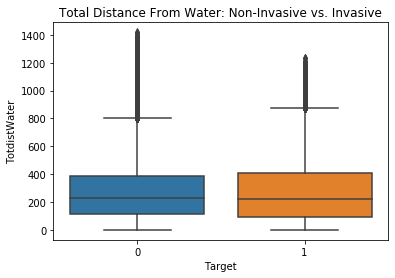

In [92]:
plt_TotdistWater = sns.boxplot(x='Target', y='TotdistWater', data=tree_species_data)
plt_TotdistWater.set_title('Total Distance From Water: Non-Invasive vs. Invasive')
print(plt_TotdistWater)

AxesSubplot(0.125,0.125;0.775x0.755)


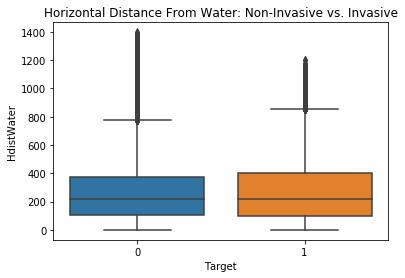

In [7]:
plt_HdistWater = sns.boxplot(x='Target', y='HdistWater', data=tree_species_data)
plt_HdistWater.set_title('Horizontal Distance From Water: Non-Invasive vs. Invasive')
print(plt_HdistWater)

AxesSubplot(0.125,0.125;0.775x0.755)


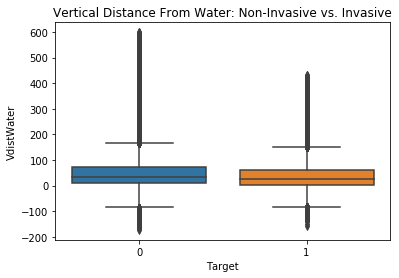

In [9]:
plt_VdistWater = sns.boxplot(x='Target', y='VdistWater', data=tree_species_data)
plt_VdistWater.set_title('Vertical Distance From Water: Non-Invasive vs. Invasive')
print(plt_VdistWater)

Figure A: Boxplot of TotdistWater vs. Target (0 = non-invasive, 1 = invasive)

AxesSubplot(0.125,0.125;0.775x0.755)


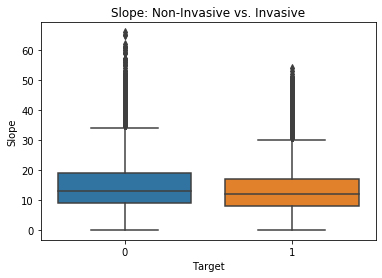

In [93]:
plt_Slope = sns.boxplot(x='Target', y='Slope', data=tree_species_data)
plt_Slope.set_title('Slope: Non-Invasive vs. Invasive')
print(plt_Slope)

Figure B: Boxplot of Slope vs. Target (0 = non-invasive, 1 = invasive)

AxesSubplot(0.125,0.125;0.775x0.755)


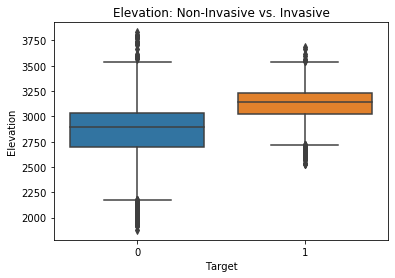

In [85]:
plt_Elevation = sns.boxplot(x='Target', y='Elevation', data=tree_species_data) 
plt_Elevation.set_title('Elevation: Non-Invasive vs. Invasive')
print(plt_Elevation)

Figure C: Boxplot of Elevation vs. Target (0 = non-invasive, 1 = invasive)

AxesSubplot(0.125,0.125;0.775x0.755)


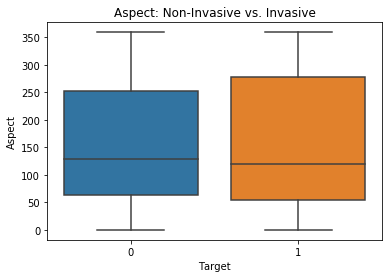

In [29]:
plt_Aspect = sns.boxplot(x='Target', y='Aspect', data=tree_species_data) 
plt_Aspect.set_title('Aspect: Non-Invasive vs. Invasive')
print(plt_Aspect)

Figure D: Boxplot of Aspect vs. Target (0 = non-invasive, 1 = invasive)

<h5> Below I investigate which features contribute the most to whether a tree species is invasive or not.</h5>
    I do this by investigating which features have averages for invasive and non-invasive species with a weighted difference greater than one. I conclude that features with a weighted difference greater than 1 are the ones that matter most to the tree species' survival (these are the features with "True" in the lsat column) 

In [94]:
# ~All invasive data -> get means~
invasive = tree_species_data['Target'] > 0
invasive_means = tree_species_data[invasive].mean()

# ~All non-invasive data -> get means~
non_invasive = tree_species_data['Target'] < 1
non_invasive_means = tree_species_data[non_invasive].mean()

# Create and display a new dataframe that compares feature means between invasive and non-invasive 
df_compare = DataFrame(tree_species_data.mean(), columns=['avg-OVERALL'])
df_compare['avg-INVASIVE'] = invasive_means
df_compare['avg-NON-INVASIVE'] = non_invasive_means
df_compare['weighted diff'] = (df_compare['avg-INVASIVE'] - df_compare['avg-NON-INVASIVE'])/df_compare['avg-OVERALL']
df_compare['|weighted diff| > 1'] = abs(df_compare['weighted diff']) > 1
df_compare
  

,avg-OVERALL,avg-INVASIVE,avg-NON-INVASIVE,weighted diff,|weighted diff| > 1
Elevation,2958.652931,3128.456025,2861.468845,0.090239,False
Aspect,155.627665,155.812731,155.521746,0.001870,False
Slope,14.104725,13.122156,14.667082,-0.109533,False
HdistWater,269.375518,270.666131,268.636856,0.007533,False
VdistWater,46.437189,42.217001,48.852546,-0.142893,False
HdistRoad,2350.882487,2616.803133,2198.687058,0.177855,False
Shade9,212.140493,212.052070,212.191100,-0.000655,False
Shade12,223.311488,223.404407,223.258307,0.000654,False
Shade3,142.521852,143.787651,141.797392,0.013965,False
HdistFire,1982.101396,2011.530224,1965.258276,0.023345,False


<h4> Establishing the Base Model </h4>
I will use 70% for training, and 30% for testing. My base model will be Logistic Regression, and my performance metric will be Area Under the Receiver Operating Characteristic Curve (ROC AUC).

In [ ]:
start = time()

# Split data into target and features
features = tree_species_data.drop(['Target'], axis=1)
target = tree_species_data.Target

# Scale Data
scaler = MinMaxScaler()
scaler.fit(features)
feat_xform = scaler.transform(features)

# Split the data into training and testing sets
feat_train, feat_test, tgt_train, tgt_test = train_test_split(feat_xform, target, test_size = 0.3, shuffle=True)

# Identify C parameter that yields highest ROC AUC
paramsLogR = {'C':[0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
LogR = LogisticRegression(penalty='l1', solver='liblinear')
clf_LogR = GridSearchCV(LogR, paramsLogR, cv=3, scoring='roc_auc')
clf_LogR.fit(feat_train, tgt_train)
print('Best params',clf_LogR.best_params_)
print('Validation set scores for increasing penalty:', clf_LogR.cv_results_['mean_test_score'])
print('Test AUC:',clf_LogR.best_estimator_.score(feat_test, tgt_test))
print('Train AUC:',clf_LogR.best_estimator_.score(feat_train, tgt_train))

print("Total Time to Train LR: %0.3fs" % (time() - start))

<h4> Solution & Performance Hypothesis </h4>


 Given that a Logistic Regression model can achieve an ROC AUC of 0.7576 on average on the test set, I predict that a Random Forect model will be able to achieve an AUC ROC of greater than or equal to 0.8600.

<center><h3> ~~~ Choosing a Model ~~~ </h3>
<h4> "Which model will lead to the highest ROC AUC?" </h4></center>

<h5> Support Vector Machine (SVM) </h5>

To choose the optimal hyperparameters for the SVM model, I trained and tested all combinations of the parameters listed in the table below:

| gamma | kernel | C |
| --- | --- | --- |
| 'scale', 'auto'  |'linear','poly','rbf','sigmoid'  | 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10|

| best gamma | best kernel | best C |
| --- | --- | --- |
| 'scale'  | 'poly' | 10 |

In [69]:
# TODO: uncomment
#paramsSVM = {'C': [10], 'kernel':['poly'], 'gamma':['scale']}
#SVM = SVC()
#clf_SVM = GridSearchCV(SVM, paramsSVM, cv=3,scoring='roc_auc')
#clf_SVM.fit(feat_train, tgt_train)
#print('Test AUC:',clf_SVM.best_estimator_.score(feat_test, tgt_test))
#print('Train AUC:',clf_SVM.best_estimator_.score(feat_train, tgt_train))

<h5> Random Forest </h5>

To choose the optimal n_estimators hyperparameter for the RandomForest model, I follow the progression in the table below:

| n_estimators | Best | ROC AUC, Test |
| --- | --- | --- |
| [10,100,1000,5000,10000] | 1000 | 0.85054 |
| [500, 750, 1000, 2500, 4000] | 4000 | 0.85083 |
| [3000, 3500, 3750, 4000, 4500, 4750] | 4000 | 0.85282 |
| [3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400] | 4400 | 0.85311 |
| [4350, 4375, 4400, 4425, 4450, 4475] | 4350 | 0.85368 |

In [70]:
# TODO: uncomment
# This is where I can test different n_estimators to feed to the grid search
#paramsRF = {'n_estimators':[4325, 4350, 4375]}
# Generate the model
#RF = RandomForestClassifier()
# Grid search for best params
#clf_RF = GridSearchCV(RF, paramsRF, cv=3,scoring='roc_auc')
# Fit the model given hyperparams
#clf_RF.fit(feat_train, tgt_train)
#print('Best params', clf_RF.best_params_)
#print('Test AUC:', clf_RF.best_estimator_.score(feat_test,tgt_test))
#print('Train AUC:', clf_RF.best_estimator_.score(feat_train, tgt_train))

<h3> Final Model Selection </h3>
<h5> Neural Networks & The Best of the SVM and RF </h5>

Now I compare a couple of the best SVM models, a couple of the best RF models, and a bunch of Neural Networks to finally find the ultimate, optimal model. 

In [40]:
############################################################################
## These are the helper functions to perform the grid searches, 
## fit the various models, and display the solutions.
############################################################################
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [43]:
#################################################################
## This is where I specify the model type 
#################################################################
models = {
    'SVM' : SVC(), 'RF': RandomForestClassifier(), 'MLP' : MLPClassifier(), 
}

#################################################################
## This is where I specify the hyperparams for the various models 
#################################################################
params = { 'SVM': {'C': [10, 100], 'kernel': ['poly'], 'gamma': ['scale']}, 
          'RF': {'n_estimators': [4355, 4360, 4361, 4362, 4363, 4364]},
    'MLP' : {'hidden_layer_sizes':[(50, 50), (50, 100, 50), (100,100,50), (100,100)], 'solver':['lbfgs'], 'activation':['identity','logistic'], 'alpha':[1, 10],
             'batch_size':['auto',100], 'learning_rate':['constant','invscaling'], 'learning_rate_init':[0.001]}}

Observations:
    - lbfgs solver consistently outperforms adam and sgd solvers in MLP
    - My two SVM models outperform all my deep learning models, and my Random Forest models all outperform the rest
        -> RF > SVM > MLP

In [44]:
#################################################################
## This is where I run the model
#################################################################

# Start time. (Just because it's interestin to see how long it takes to fit!)
start = time()


# Define the models and parameters
helper = EstimatorSelectionHelper(models, params)

# Fit the models
helper.fit(feat_train, tgt_train, scoring='roc_auc')

# Print the output and rank by mean AUC
summary_tbl = helper.score_summary(sort_by='mean_score')
print(summary_tbl)
print("Total Time: %0.3fs" % (time() - start))

Running GridSearchCV for SVM.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for RF.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 12.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running GridSearchCV for MLP.
Fitting 3 folds for each of 64 candidates, totalling 192 fits
SVM
RF
MLP
   estimator min_score mean_score max_score   std_score    C activation alpha  \
3         RF  0.899213   0.909287  0.916273  0.00729913  NaN        NaN   NaN   
4         RF  0.899066   0.909278  0.916479  0.00742068  NaN        NaN   NaN   
7         RF  0.898858   0.909199  0.916463  0.00750899  NaN        NaN   NaN   
2         RF  0.899015   0.909181  0.916387  0.00739451  NaN        NaN   NaN   
5         RF  0.898953   0.909115  0.916242  0.00737705  NaN        NaN   NaN   
6         RF  0.898411   0.908923  0.915866  0.00755944  NaN        NaN   NaN   
1        SVM  0.866653   0.875823  0.886389  0.00811748  100        NaN   NaN   
0        SVM  0.852418   0.866537  0.878405   0.0107279   10        NaN   NaN   
49       MLP  0.835624   0.848245  0.862024   0.0108091  NaN   logistic     1   
40       MLP  0.836314   0.847968  0.862369   0.0108127  NaN   logistic     1   
41    

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  9.3min finished
/Users/srkirmis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



<center><h3> ~~~ Training & Fitting the Final Model ~~~ </h3>
</center>

<h4>Final Model Selection:</h4> Random Forest, n_estimators = 4360

In [52]:
start = time()
best_model = RandomForestClassifier(n_estimators=4360)
best_model.fit(feat_train, tgt_train)
print('Final Test AUC:', best_model.score(feat_test,tgt_test))
print('Final Train AUC:', best_model.score(feat_train, tgt_train))
print(print("Total Time to Train & Test: %0.3fs" % (time() - start)))

Final Test AUC: 0.8531089560752995
Final Train AUC: 1.0
Total Time to Train & Test: 68.216s
None
